## K-Fold cross validation
Fit the model using SVM and apply k-fold cross validation technique to check accuracies for a dataset given in the url  


In [6]:
# Importing the libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from matplotlib.colors import ListedColormap
import pickle

In [2]:
# Importing the dataset

dataset = pd.read_csv('test.csv')

In [3]:
# split dataset in features and lable

x_test = dataset.iloc[:, [2, 3]].values
y_test = dataset.iloc[:, 4].values

# x_cv = cv.iloc[:, [2, 3]].values
# y_cv = cv.iloc[:, 4].values

In [4]:
# Feature Scaling

sc = StandardScaler()
x_test = sc.fit_transform(x_test)
# x_cv = sc.transform(x_cv)

In [7]:
# load model

file = open("model.pickle",'rb')
classifier=pickle.load(file)


In [8]:
# Predicting the Test set results

y_pred = classifier.predict(x_test)

In [9]:
# Making the Confusion Matrix

cm = confusion_matrix(y_test, y_pred)
print("confusion_matrix\n",cm)

confusion_matrix
 [[64  4]
 [ 3 29]]


In [10]:
# Applying k-Fold Cross Validation

accuracies = cross_val_score(estimator = classifier, X = x_test, y = y_test, cv = 10)
accuracies.mean()
accuracies.std()

0.07602135894346175

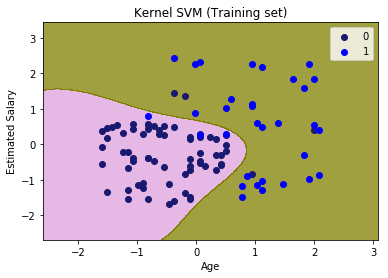

In [13]:
# Visualising the Training set results

X_set, y_set = x_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('plum', 'olive')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('midnightblue', 'blue'))(i), label = j)
plt.title('Kernel SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()